# Phase B: Descriptive Operational Analytics

## Objective
Understand how the support operation behaves by analyzing ticket volume concentrations, resolution time distributions, and customer satisfaction correlations.

## Key Questions
- Where is volume concentrated?
- Which ticket types take the longest to resolve?
- Is there a correlation between resolution speed and customer satisfaction?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
sns.set_palette("viridis")
plt.style.use('ggplot')

## 1. Load Cleaned Data

In [2]:
df = pd.read_csv('../data/customer_support_tickets.csv')

# Re-apply cleaning from Phase A
date_cols = ['First Response Time', 'Time to Resolution']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

df['Customer Satisfaction Rating'] = df['Customer Satisfaction Rating'].fillna(df['Customer Satisfaction Rating'].median())

# Derived columns for analysis
# Resolution Processing Time (RPT) = Time to Resolution - First Response Time
df['RPT_hours'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600

print(f"Dataset loaded with {len(df)} records.")

Dataset loaded with 8469 records.


## 2. Ticket Volume Breakdown

/var/folders/8d/qj3p2kq56bq3zdf5zq1hzd400000gn/T/ipykernel_13056/3833184987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Ticket Type', ax=axes[0,0], palette='viridis')
/var/folders/8d/qj3p2kq56bq3zdf5zq1hzd400000gn/T/ipykernel_13056/3833184987.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Ticket Priority', ax=axes[0,1], order=['Low', 'Medium', 'High', 'Critical'], palette='viridis')
/var/folders/8d/qj3p2kq56bq3zdf5zq1hzd400000gn/T/ipykernel_13056/3833184987.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns

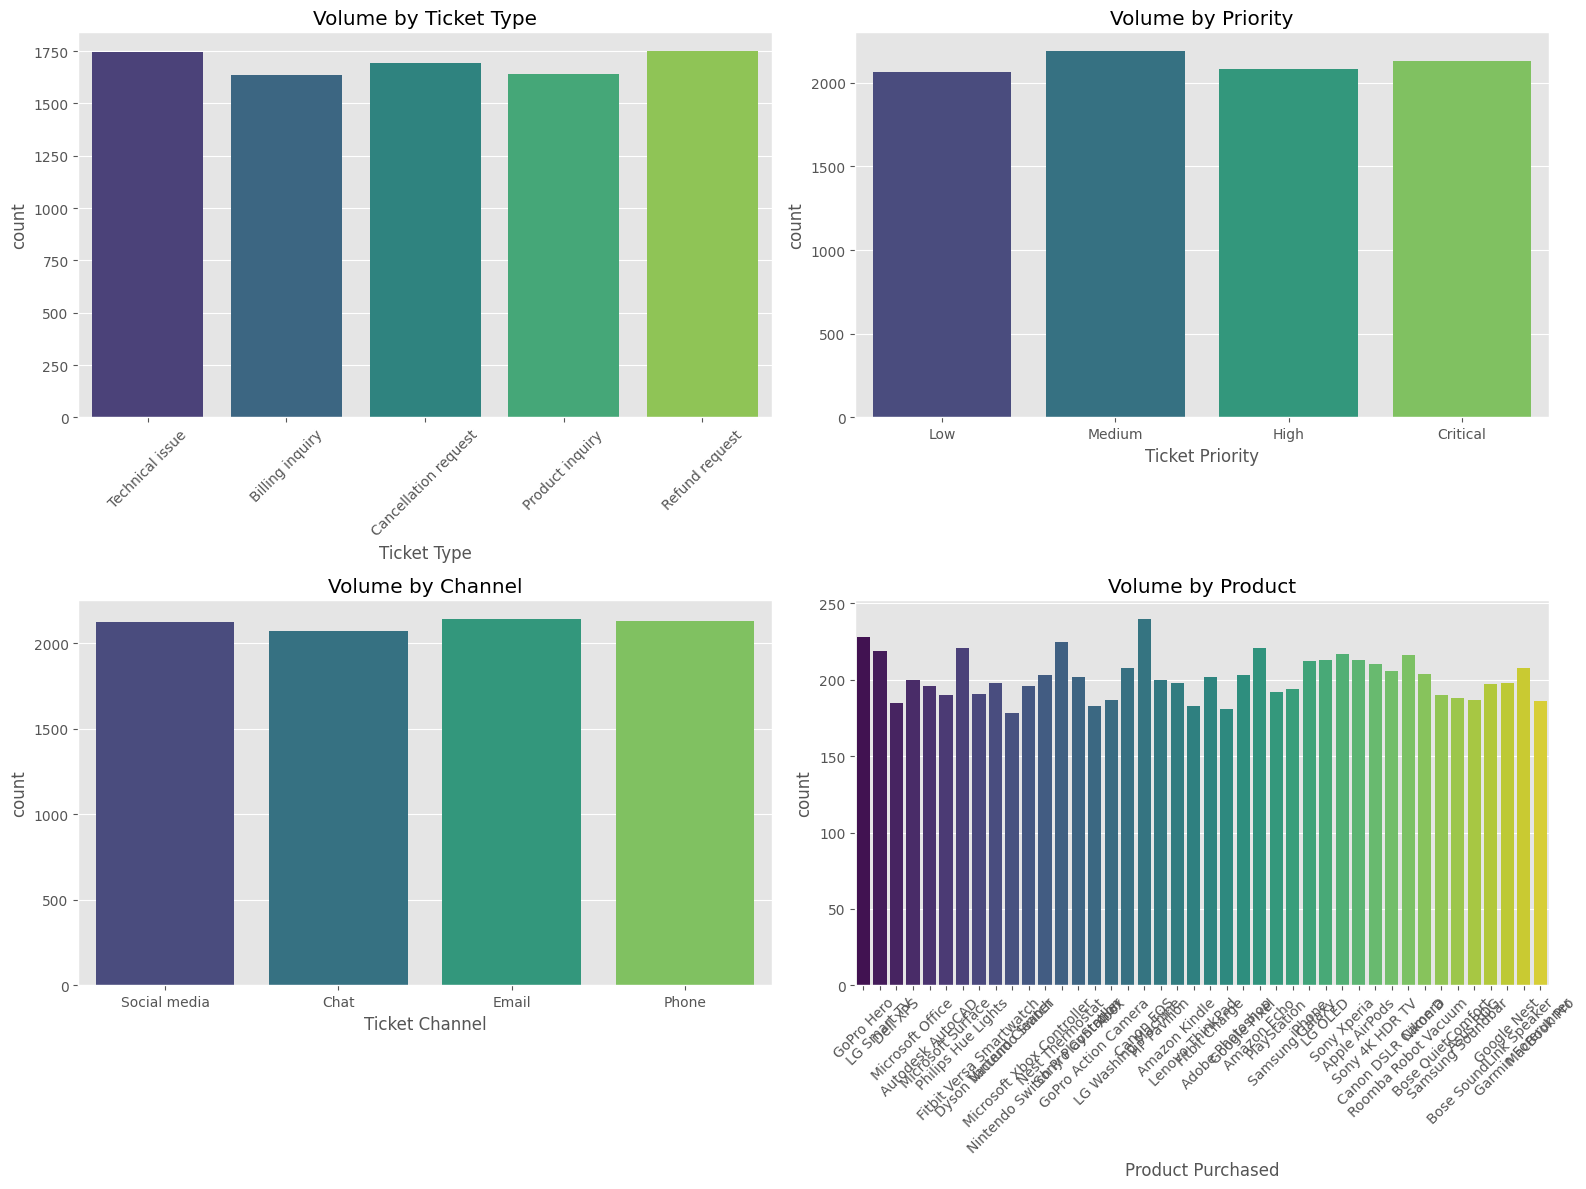

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.countplot(data=df, x='Ticket Type', ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Volume by Ticket Type')
axes[0,0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='Ticket Priority', ax=axes[0,1], order=['Low', 'Medium', 'High', 'Critical'], palette='viridis')
axes[0,1].set_title('Volume by Priority')

sns.countplot(data=df, x='Ticket Channel', ax=axes[1,0], palette='viridis')
axes[1,0].set_title('Volume by Channel')

sns.countplot(data=df, x='Product Purchased', ax=axes[1,1], palette='viridis')
axes[1,1].set_title('Volume by Product')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../outputs/charts/phase_b_volume_breakdown.png')
plt.show()

## 3. Operational Time Metrics (Resolution Processing Time)

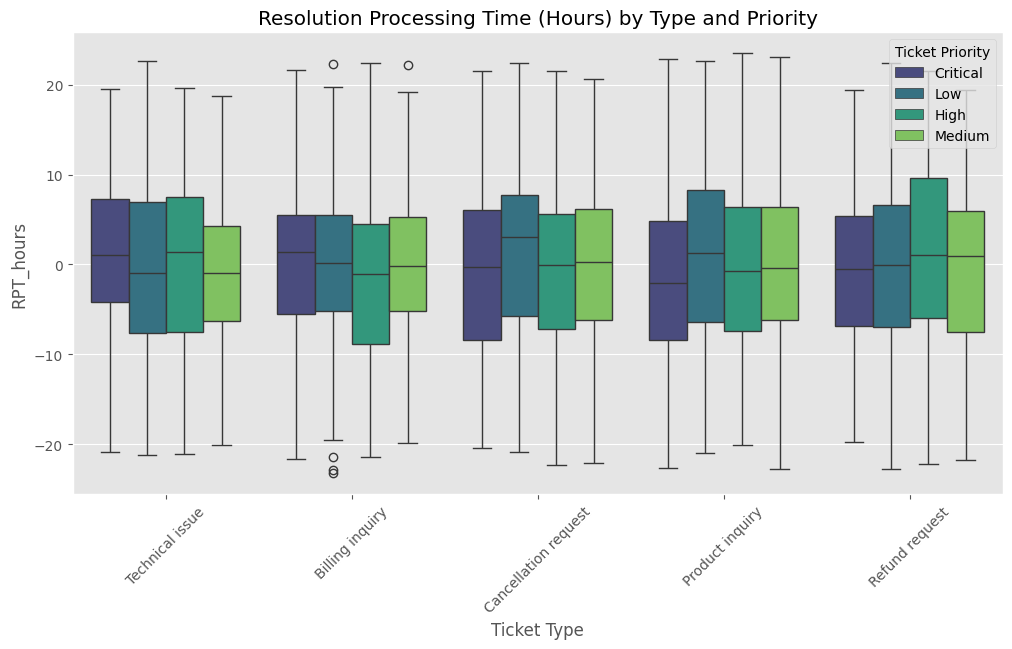

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Ticket Type', y='RPT_hours', hue='Ticket Priority', palette='viridis')
plt.title('Resolution Processing Time (Hours) by Type and Priority')
plt.xticks(rotation=45)
plt.savefig('../outputs/charts/phase_b_rpt_distribution.png')
plt.show()

## 4. CSAT Analysis

/var/folders/8d/qj3p2kq56bq3zdf5zq1hzd400000gn/T/ipykernel_13056/4043823925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Customer Satisfaction Rating', y='RPT_hours', palette='viridis', errorbar=None)


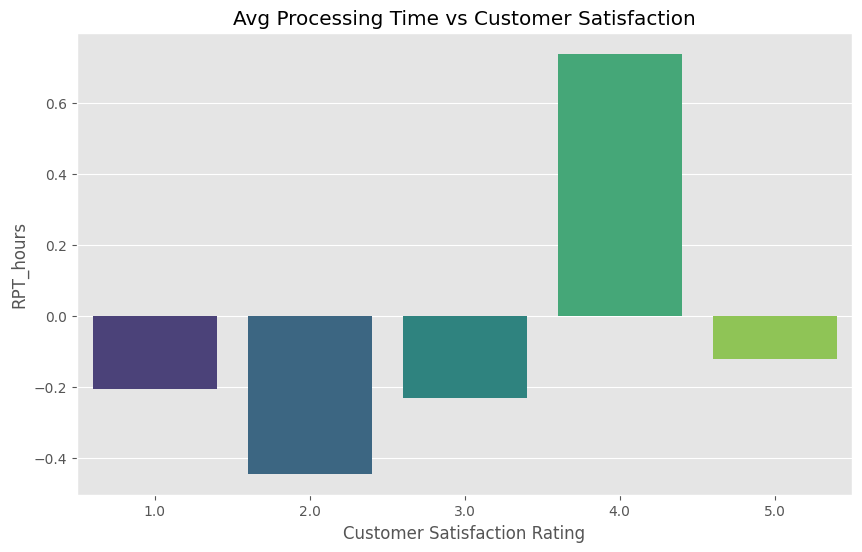

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Customer Satisfaction Rating', y='RPT_hours', palette='viridis', errorbar=None)
plt.title('Avg Processing Time vs Customer Satisfaction')
plt.savefig('../outputs/charts/phase_b_csat_vs_rpt.png')
plt.show()

## 5. Summary Insights

In [6]:
ops_summary = df.groupby('Ticket Type').agg({
    'Ticket ID': 'count',
    'RPT_hours': 'mean',
    'Customer Satisfaction Rating': 'mean'
}).rename(columns={'Ticket ID': 'Ticket Volume', 'RPT_hours': 'Avg RPT (Hrs)', 'Customer Satisfaction Rating': 'Avg CSAT'})

ops_summary.to_csv('../outputs/summary_tables/phase_b_ops_summary.csv')
ops_summary

,Ticket Volume,Avg RPT (Hrs),Avg CSAT
Ticket Type,,,
Billing inquiry,1634,-0.207813,3.009180
Cancellation request,1695,-0.165924,3.008850
Product inquiry,1641,-0.243183,3.005484
Refund request,1752,0.218037,2.977740
Technical issue,1747,0.066466,2.986262
